Reporte de Calidad de los Datos.
-------

En este informe iremos haciendo un analisis exploratorio de los datos (EDA) junto con el proceso de extraccion, transformacion y carga (ETL) para asi obtener datos limpios y de calidad, con un diccionario de datos de las columnas. <br>Finalmente podremos cargarlo a una base de datos y luego llevarlo a Power BI donde realizaremos un dashboard interactivo que recopile tal informacion.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
data = pd.read_csv('AccidentesAviones.csv')

In [110]:
print('Cantidad de accidentes de aviones registrados a partir del siglo XX: ',data.shape[0])

Cantidad de accidentes de aviones registrados a partir del siglo XX:  5008


Vistazo general del CSV dado

In [111]:
data.head()

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...



Podemos observar las columnas que componen el dataset. En principio la columna Unnamed: 0 pareceria un identificador de cada accidente.  Las demás columnas parece contener información útil para nuestro analisis.<br> Podemos notar algunas columnas en donde sus nombres no son muy intuitivos, lo iremos viendo mas adelante...

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          5008 non-null   object
 3   Ruta                    5008 non-null   object
 4   OperadOR                5008 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   5008 non-null   object
 7   ac_type                 5008 non-null   object
 8   registration            5008 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   object
 11  PASAJEROS A BORDO       5008 non-null   object
 12  crew_aboard             5008 non-null   object
 13  cantidad de fallecidos  5008 non-null   object
 14  passenger_fatalities    5008 non-null   object
 15  crew

Casi todas las columnas estan con tipo de dato object, habra que cambiarlo. <br>
Ademas notamos que no hay valores faltantes en ninguna columna. Esto se debe a que estos datos estan completados con '?'. <br>
Para facilitar el proceso ETL vamos a remplazarlo por nan

In [113]:
data.replace( '?', np.nan, inplace=True)

Ahora si podemos ver que SI HAY VALORES FALTANTES

In [114]:
data.isna().sum()

Unnamed: 0                   0
fecha                        0
HORA declarada            1504
Ruta                         5
OperadOR                    10
flight_no                 3682
route                      762
ac_type                     13
registration               272
cn_ln                      667
all_aboard                  17
PASAJEROS A BORDO          221
crew_aboard                219
cantidad de fallecidos       8
passenger_fatalities       235
crew_fatalities            235
ground                      44
summary                     59
dtype: int64

Viendolo en grafico de barras

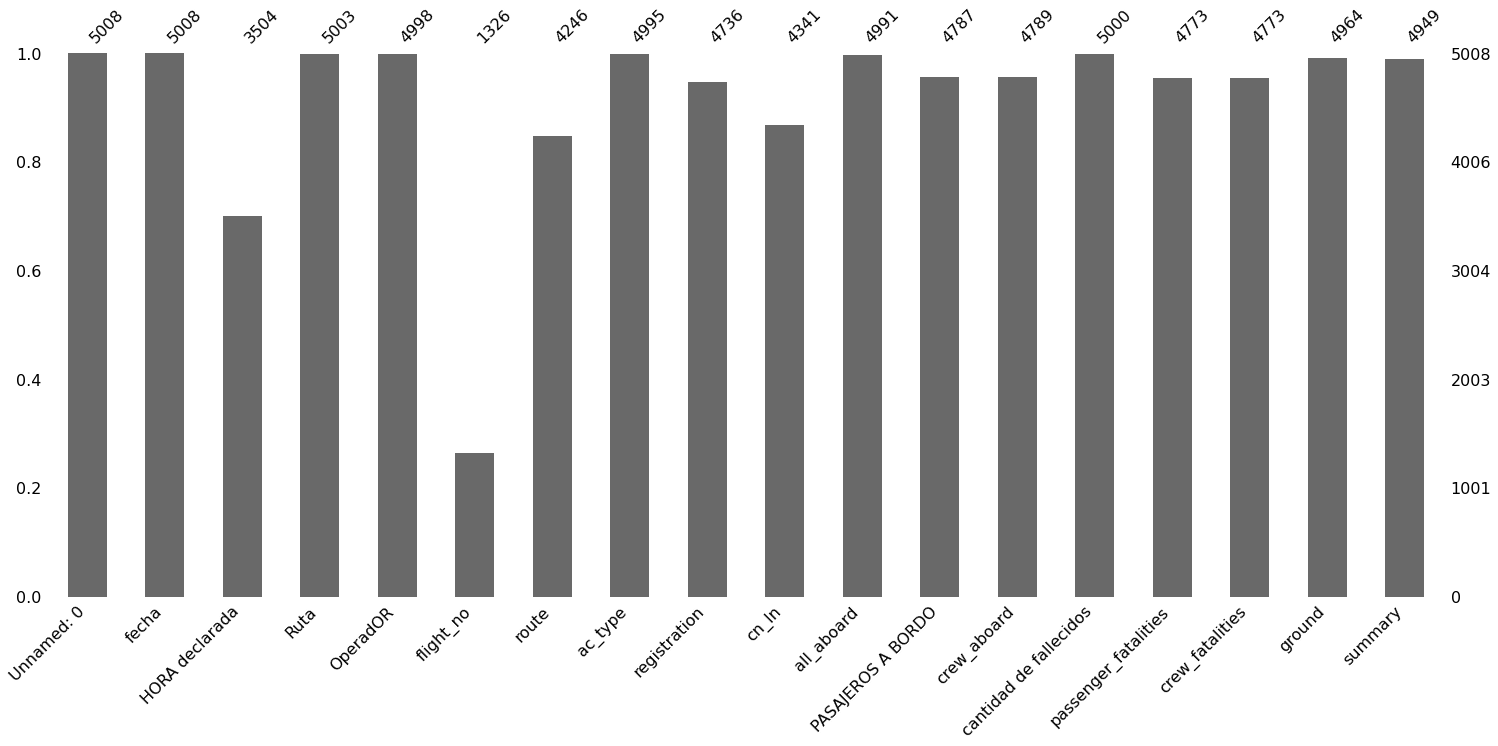

In [115]:
import missingno as msno

msno.bar(data)
plt.show()

Las columnas con mas valores faltantes son flight_no y HORA declarada

No hay valores duplicados

In [116]:
data[data.duplicated()]

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary


Veamos las fechas en que sucedieron los accidentes

La **Organización de Aviación Civil Internacional (OACI)**, organismo de la Organización de las Naciones Unidas, nos pide investigar en profundidad los accidentes producidos desde inicios del siglo XX.

Cambiamos el tipo de dato a la fecha

In [117]:
data['fecha'] = data['fecha'].astype('datetime64[ns]')

El rango de fechas deberia ser desde 1901 hasta la actualidad. Veamos las fechas minima y maxima.

In [118]:
print('Fecha minima:',data['fecha'].min())
print('Fecha maxima:',data['fecha'].max())

Fecha minima: 1908-09-17 00:00:00
Fecha maxima: 2021-07-06 00:00:00


Podria haber mas de un accidente en un mismo dia?

In [119]:
cant = data['fecha'].value_counts()
cant.head(10)

1988-08-31    4
2001-09-11    4
1945-02-23    3
1946-12-28    3
1992-08-27    3
1978-09-03    3
1985-10-11    3
1989-07-19    3
1946-12-25    3
1970-12-31    3
Name: fecha, dtype: int64

La respuesta es SI y varios dias ha sucedido esto. Podriamos decir que en el siglo XX hayan tenido menos tecnologia que en el siglo actual y por eso la mayoria de los casos son entre 1901 y 2000. <br>
Sin embargo, tambien vemos que a principios del siglo XXI en 2001 hubo 4 accidentes en un mismo dia.<br>
En estos casos puede deberse a una colision de aviones.

Veamos si podemos encontrar informacion de el dia 31 de agosto de 1988

In [120]:
mask = data[data['fecha'] == '1988-08-31']
mask

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
3508,3508,1988-08-31,NaN,"Merida, Mexico",Aerocaribe,NaN,NaN,Convair CV-240,XA-HUL,229,20,NaN,NaN,1,NaN,NaN,0,Crashed while taking off.
3509,3509,1988-08-31,0919,"Kowloon Bay, Hong Kong",CAAC,301,Guangzhou - Hong Kong,Hawker Siddeley HS-121 Trident 2E,B-2218,2159,89,78,11,7,1,6,0,The right outboard flap of the plane hit the a...
3510,3510,1988-08-31,0901,"Dallas, Texas",Delta Air Lines,1141,"Dallas/Fort Worth, TX - Salt Lake City, UT",Boeing B-727-232 Adv,N473DA,20750/992,108,101,7,14,12,2,0,The aircraft stalled and crashed during takeof...
3511,3511,1988-08-31,1000,"Cerro de la Calera, Mexico",Transporte Aereo Federal,NaN,Uruapan - Lazro,Embraer 110P1 Bandeirante,XC-COX,110-192,20,18,2,20,18,2,0,The plane disappeared after taking off from Ur...


Observaciones<br>
- No solo ocurrieron el mismo dia sino tambien en horarios con no mas de 1 hora. 
- La ruta donde ocurrieron no pareceria ser lugares demasiado cercanos como para una colision. <br>
Veamos en un mapa 

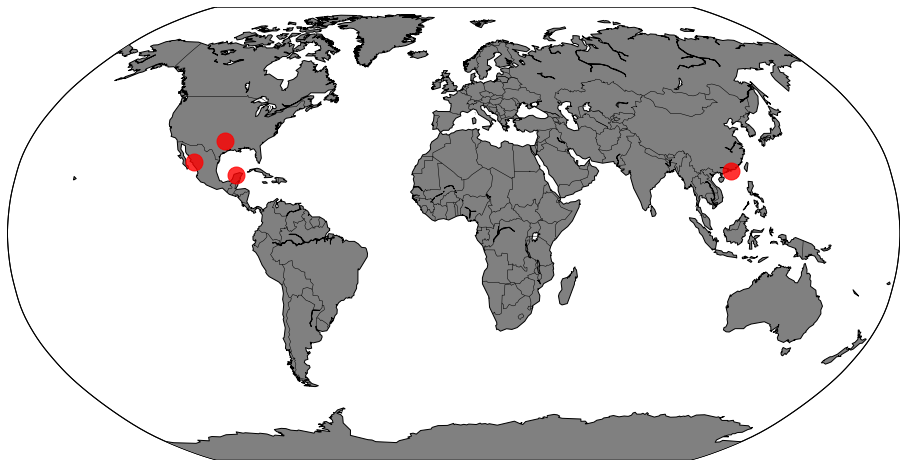

In [121]:
#Dibujar mapas
from mpl_toolkits.basemap.test import Basemap
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import time

geo = Nominatim(user_agent='coord', timeout=2)
lugares = list(mask['Ruta'])

#Dimensiónd de la figura
plt.figure(figsize=(16,12))

#Distribución lines costeras
eq_map=Basemap(projection='robin',lon_0=0,lat_0=0)

#Dibujar lineas costeras y paises
eq_map.drawcoastlines()
eq_map.drawcountries()

#Definir colores
eq_map.fillcontinents(color="grey")
eq_map.drawmapboundary(fill_color="white")

# Recorrer la lista de lugares
for i in lugares:
    address = geo.geocode(i)
    #Situo el lugar en el mapa
    x,y = eq_map(address.longitude,address.latitude)
    eq_map.plot(x,y, "ro", markersize=17, alpha=0.8)

Imposible que sea por colision. <br>
- Chequeamos las descripciones.

In [122]:
list(mask.summary)

['Crashed while taking off.',
 'The right outboard flap of the plane hit the approach lights of Runway 31. The right main landing gear collapsed and the aircraft ran off the runway into the harbor.',
 'The aircraft stalled and crashed during takeoff, hitting a ILS localizer antenna, 1,000 feet beyond the end of the runway. Crew error. Improperly set flaps and slats. Failure of the takeoff safety warning system.',
 'The plane disappeared after taking off from Uruapan. Wreckage was found in the western Sierre Madre mountains.']

Podemos ver que fueron por problemas de mantenimiento, clima y aterrizaje

Queremos ver la cantidad de accidentes por año

In [123]:
from datetime import datetime

data['Año'] = data['fecha'].dt.year

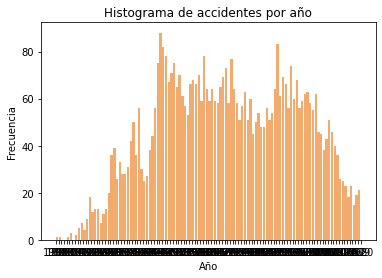

In [124]:
intervalos = range(data['Año'].min(), data['Año'].max())

plt.hist(x=data.Año, bins=intervalos, color='#F2AB6D', rwidth=0.85)
plt.title('Histograma de accidentes por año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)

plt.show()

Notamos que la cantidad de accidentes disminuyo en el siglo XXI.

Seguimos con la columna de HORA declarada

In [125]:
print('Cantidad de valores faltantes:', data['HORA declarada'].isna().sum())

Cantidad de valores faltantes: 1504


In [126]:
print('Porcentaje de valores faltantes de la variable Hora:', (data['HORA declarada'].isnull().sum()/len(data)) * 100)

Porcentaje de valores faltantes de la variable Hora: 30.031948881789138


Decidimos dropear la columna ya que contiene un 30% de nulos y ademas no es muy relevante para nuestro analisis.

In [127]:
data = data.drop('HORA declarada', axis=1)

Veamos cuales filas son.

In [128]:
data[data['Ruta'].isna()]

,Unnamed: 0,fecha,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary,Año
360,360,1934-12-31,NaN,Aeroflot,NaN,NaN,Tupolev ANT-9,NaN,NaN,10,8,2,10,8,2,0,Crashed under unknown circumstances.,1934
465,465,1937-06-20,NaN,ENTA,NaN,San José San Isidro de El General,Travel Air 6000,TI-3,NaN,6,5,1,6,5,1,NaN,Hit trees and crashed in an isolated area loca...,1937
646,646,1942-08-21,NaN,Deutsche Lufthansa,NaN,NaN,Siebel Si-204,NaN,NaN,4,2,2,4,2,2,0,"Lufthansa chairman, Von Gablenz killed.",1942
999,999,1947-11-27,NaN,China National Aviation Corporation,NaN,NaN,Douglas DC-3,NaN,NaN,3,0,3,2,0,2,0,The cargo plane was shot down by communist ant...,1947
2895,2895,1977-01-20,NaN,North Canada Air,NaN,NaN,Bristol 170 Freighter 31M,C-FWAD,13253,2,0,2,1,0,1,0,The cargo plane stalled nearly vertical and cr...,1977


Esta columna es la ubicacion en donde se produjo el accidente, MUY IMPORTANTE PARA NUESTRO ANALISIS.
Que podriamos hacer con estos 5 registros?
- Colocarle la ruta con mayor cantidad, en este caso, Moscow, Russia.<br> 
Considero no tiene mucho sentido ya que no todos los aviones pasan por este lugar.
- Sacar la latitud y longitud de todos los datos de la columna ruta y colocarle la media.<br>
 Tampoco me parece bien, nos puede dar en un lugar en el que ni siquiera pasan aviones.
- Colocarle las coordenadas donde se encuentra el Operador
- Dropear los nulos.

A mi parecer considero que debe quedar la informacion exacta en esta columna, que no podemos 'rellenar' esos datos. optamos por dropearlos

In [129]:
data = data.dropna(subset=['Ruta'])

Veamos los lugares de los accidentes

In [130]:
data.Ruta.unique()

array(['Fort Myer, Virginia', 'Juvisy-sur-Orge, France',
       'Atlantic City, New Jersey', ..., 'Near Pyin Oo Lwin, Myanmar',
       'Patikul, Sulu, Philippines', 'Palana, Russia'], dtype=object)

Muchos de ellos estan mal escritos o con palabras que no dejan claro donde es.<br>
Intentamos hacer un mapa pero eran demasiados errores.

Para que queden los lugares exactos y no nos de error quitamos los 'Near', 'Over'

In [131]:
data['Ruta'] = data['Ruta'].str.replace(', ', ',')
data['Ruta'] = data['Ruta'].str.replace('Over ', '')
data['Ruta'] = data['Ruta'].str.replace('Near ', '')
data['Ruta'] = data['Ruta'].str.replace('Off ', '')

- Bulgaria esta escrito como BulgEria
- Catonsville esta escrito como Cantonsville
- Folkestone esta escrito como Forkstone
- Caterham esta escrito como Catherham
- Millersburg esta escrito como Hillersburg
- Mendota,Minnesota esta escrito como Mendotta,Minnisota
- Brownson esta escrito como Brawnson
- Larache esta escrito com La Rache


In [132]:
data['Ruta'] = data['Ruta'].str.replace('Jambol,Bulgeria', 'Jambol,Bulgaria')
data['Ruta'] = data['Ruta'].str.replace(',North Sea', '')
data['Ruta'] = data['Ruta'].str.replace('Cantonsville,Maryland', 'Catonsville,Maryland')
data['Ruta'] = data['Ruta'].str.replace('English Channel off Forkstone,Kent', 'Folkestone,Kent')
data['Ruta'] = data['Ruta'].str.replace('Catherham,Surrey,UK', 'Caterham,Surrey,UK')
data['Ruta'] = data['Ruta'].str.replace('Hillersburg,Pennsylvania', 'Millersburg,Pennsylvania')
data['Ruta'] = data['Ruta'].str.replace('Mendotta,Minnisota', 'Mendota,Minnesota')
data['Ruta'] = data['Ruta'].str.replace('Brawnson,Nebraska', 'Brownson,Nebraska')
data['Ruta'] = data['Ruta'].str.replace('La Rache,Morocco', 'LaRache,Morocco')
data['Ruta'] = data['Ruta'].str.replace('the Panama coast', 'the Panama')
data['Ruta'] = data['Ruta'].str.replace('the Gulf of Finland', 'Gulf of Finland')
data['Ruta'] = data['Ruta'].str.replace('Desertores Island Región de Los Lagos','Desertores Island')
data['Ruta'] = data['Ruta'].str.replace('Pavillon,New York', 'Pavilion,New York')
data['Ruta'] = data['Ruta'].str.replace('the coast of France', 'France')
data['Ruta'] = data['Ruta'].str.replace('Territory of New Guinea', 'New Guinea')
data['Ruta'] = data['Ruta'].str.replace('Santiago del Estado,Argentina', 'Santiago del Estero,Argentina')
data['Ruta'] = data['Ruta'].str.replace('the North Atlantic', 'North Atlantic')
data['Ruta'] = data['Ruta'].str.replace('North of San Juan,Puerto Rico', 'San Juan,Puerto Rico')
data['Ruta'] = data['Ruta'].str.replace('Barajas,Madrid,Spain', 'Barajas,Madrid,España')
data['Ruta'] = data['Ruta'].str.replace('Mt. Butler,Hong Kong', 'Mount Butler,Hong Kong',regex=True)

# Y ASI PODRIA SEGUIR!
# EN EL NOTEBOOK geocode.ipynb estare haciendo mas modificaciones pero no creo llegar con el tiempo para hacer todas

Veamos los operadores

Renombramos la columna

In [133]:
data = data.rename(columns={'OperadOR':'Operador'})

In [134]:
print('Cantidad de valores faltantes:', data['Operador'].isna().sum())

Cantidad de valores faltantes: 10


In [135]:
data[data.Operador.isna()]

,Unnamed: 0,fecha,Ruta,Operador,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary,Año
1,1,1909-09-07,"Juvisy-sur-Orge,France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,1909
17,17,1917-06-17,"Yarmouth,England",NaN,NaN,NaN,Zepplin L-48 (air ship),L-48,NaN,16,NaN,NaN,14,NaN,NaN,0,Shot down by aircraft.,1917
67,67,1922-04-08,"Pao Ting Fou,China",NaN,NaN,Test,NaN,NaN,NaN,17,0,17,17,0,17,0,Aboard were all workers taking part in a fligh...,1922
69,69,1922-07-04,"Fuhlsbuttel,Germany",NaN,NaN,Hamburg - Berlin,LVG C VI,NaN,NaN,3,2,1,2,1,1,0,The passenger/mail plane lost it's engine whil...,1922
114,114,1926-09-26,"New York,New York",NaN,NaN,New York - Paris,Sikorsky S-25,NaN,NaN,5,4,1,2,2,0,0,Too much weight caused the landing gear to col...,1926
376,376,1935-05-29,"San Barbra,Honduras",NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,6,NaN,NaN,0,Crashed into the Ulua River.,1935
684,684,1943-07-04,Gibraltar,NaN,NaN,NaN,Consolidated Liberator B24 C,A-L-523,NaN,13,NaN,NaN,12,NaN,NaN,0,"The flight, bound for London, crashed into the...",1943
859,859,1946-04-08,"Shensi,China",NaN,NaN,Shensi - Yenan,NaN,NaN,NaN,14,11,3,14,11,3,0,NaN,1946
2061,2061,1963-09-02,Northeast Laos,NaN,NaN,NaN,Curtiss C-46 Commando,NaN,NaN,16,13,3,15,12,3,NaN,Refugee flight.,1963
4830,4830,2011-12-26,"Green Grove,Florida",NaN,NaN,"Jacksonville, FL - Gainsville, FL",Bell 206B,N5016M,2636,3,2,1,3,2,1,0,The on-demand air taxi was on a flight to proc...,2011


Son unos pocos nulos, para no perder registros de las demas columnas le colococamos como Otro

In [136]:
data = data.fillna({'Operador':'Otro'})

Cantidad de accidentes por operador

In [137]:
data['Operador'].value_counts().head(10)

Aeroflot                               252
Military - U.S. Air Force              141
Air France                              74
Deutsche Lufthansa                      62
United Air Lines                        44
Military - U.S. Army Air Forces         43
China National Aviation Corporation     42
Pan American World Airways              41
American Airlines                       37
US Aerial Mail Service                  35
Name: Operador, dtype: int64

El operador Aeroflot es el que mas accidentes a tenido,la aerolinea mas peligrosa.<br>
El operador de ejercito con mas accidentes es Military US Air Force

Muchos de los aviones son militares, vamos a dividirlo entre militar y no militar

In [138]:
f_militar =data[data.Operador.str.contains('military | force', case=False)]

In [139]:
lista_militar = list(f_militar['Operador'].unique())

In [140]:
data['Tipo de Operador'] = np.nan

In [141]:
for x in lista_militar:
    data['Tipo de Operador'].fillna(data['Operador'].apply(lambda i:'Militar' if i == x else np.nan), inplace=True)

In [142]:
data.fillna({'Tipo de Operador':'Comercial'}, inplace=True)

In [143]:
data['Tipo de Operador'].value_counts()

Comercial    4213
Militar       790
Name: Tipo de Operador, dtype: int64

La columna flight_no indica el numero de vuelo. Veamos su info

In [144]:
print('Cantidad de valores faltantes:', data['flight_no'].isna().sum())

Cantidad de valores faltantes: 3677


In [145]:
print('Porcentaje de valores faltantes:', (data['flight_no'].isnull().sum()/len(data)) * 100)

Porcentaje de valores faltantes: 73.49590245852488


Nos falta mas del 50% de los datos y no es una columna muy necesaria para nuestro analisis. la eliminamos.

In [146]:
data = data.drop('flight_no', axis=1)

Chequeamos la columna de route que seria el recorrido que hace o deberia haber hecho el avion

In [147]:
print('Porcentaje de valores faltantes:', (data['route'].isnull().sum()/len(data)) * 100)

Porcentaje de valores faltantes: 15.150909454327405


In [148]:
print('Cantidad de valores faltantes:', data['route'].isna().sum())

Cantidad de valores faltantes: 758


In [149]:
data['route'].value_counts().head(10)

Training                      96
Sightseeing                   31
Test flight                   23
Sao Paulo - Rio de Janeiro     7
Test                           6
Rio de Janeiro - Sao Paulo     5
Demonstration                  4
Tallinn - Helsinki             4
Barranquilla - Bogota          4
Paris - London                 4
Name: route, dtype: int64

Veamos cuantos de los accidentes por entrenamiento son militares o comerciales

In [150]:
train = data[(data['route'] == 'Training')]
print(train.shape)

(96, 18)


De 96 entrenamientos, 32 eran militares

In [151]:
train_militar = train[train['Tipo de Operador'] == 'Militar']
train_militar.shape

(39, 18)

De los 23 que iban sin pasajeros, solo tripulantes, todos ellos eran aviones militares

Completamos valores faltantes

In [152]:
data.fillna({'route':'Desconocido'}, inplace=True)

Renombramos

In [153]:
data = data.rename(columns={'route':'Trayecto'})

Chequeamos la columna de Registracion

In [154]:
print('Porcentaje de valores faltantes:', (data['registration'].isnull().sum()/len(data)) * 100)

Porcentaje de valores faltantes: 5.376773935638616


In [155]:
print('Cantidad de valores faltantes:', data['registration'].isna().sum())

Cantidad de valores faltantes: 269


In [156]:
data = data.fillna({'registration':'Sin Dato'})

In [157]:
data['registration'].value_counts()

Sin Dato      269
49              3
SU-AFK          2
2               2
19              2
             ... 
CCCP-61663      1
EC-ANR          1
N1301N          1
CS-THB          1
RA-26085        1
Name: registration, Length: 4699, dtype: int64

Esta libreria nos dice de que pais es el avion.
https://github.com/Collen-Roller/flydenity

In [158]:
from flydenity import Parser
parser = Parser()
parser.parse('F-BBDM')['nation']

'France'

In [159]:
def Pais(x):
      try:
            return parser.parse(x)['nation']
      except:
            return 'No encontrado'

In [160]:
data['Origen'] = data['registration'].dropna().apply(Pais)

In [161]:
data['Origen'].fillna('No encontrado', inplace=True)

In [162]:
data['Origen'].value_counts()

No encontrado          1351
United States           999
France                  211
United Kingdom          198
Brazil                  150
                       ... 
Kuwait                    1
Malawi                    1
Iraq                      1
Antigua and Barbuda       1
Barbados                  1
Name: Origen, Length: 154, dtype: int64

Renombramos la columna

In [163]:
data = data.rename(columns={'registration':'Registro'})

La columna ac_type nos dice el modelo del avion

In [164]:
print('Cantidad de valores faltantes:', data['ac_type'].isna().sum())

Cantidad de valores faltantes: 13


Modelos con mas accidentes

In [165]:
data.ac_type.value_counts().head(10)

Douglas DC-3                                332
de Havilland Canada DHC-6 Twin Otter 300     81
Douglas C-47A                                70
Douglas C-47                                 64
Douglas DC-4                                 41
Antonov AN-26                                35
Yakovlev YAK-40                              35
Junkers JU-52/3m                             30
Douglas C-47B                                27
Douglas DC-6B                                27
Name: ac_type, dtype: int64

completamos valores faltantes con sin dato

In [166]:
data['ac_type'].fillna('Sin Dato', inplace=True)

In [167]:
model_douglas = data[data.ac_type.str.contains('douglas', case=False)]
print(model_douglas.shape)
model_douglas

(1126, 19)


,Unnamed: 0,fecha,Ruta,Operador,Trayecto,ac_type,Registro,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary,Año,Tipo de Operador,Origen
125,125,1927-04-22,"Goshen,Indiana",US Aerial Mail Service,Desconocido,Douglas M-4,626,NaN,1,0,1,1,0,1,0,Crashed into a field during a snow storm.,1927,Comercial,No encontrado
137,137,1927-11-29,"Corunna,Indiana",National Air Transport,Desconocido,Douglas M-4,NC62 \t\rNC1062,PO641,1,0,1,1,0,1,0,The postal plane crashed at night in poor weat...,1927,Comercial,No encontrado
153,153,1928-06-22,"Lebo,Kansas",National Air Transport,Chicago - Dallas,Douglas M-4,NC1059,628,1,0,1,1,0,1,0,The mail plane flew into tornado like winds an...,1928,Comercial,United States
163,163,1928-10-18,"Polk,Pennsylvania",National Air Transport,Desconocido,Douglas M-4,NC1064,658,1,0,1,1,0,1,0,The mail plane crashed into a hill and burned ...,1928,Comercial,United States
168,168,1928-11-25,"Bristolville,Ohio",National Air Transport,Desconocido,Douglas M-4,NC792,650,1,0,1,1,0,1,0,The mail plane crashed in a snow storm.,1928,Comercial,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4840,4840,2012-06-03,"Lagos,Nigeria",Dana Air,Abuja - Lagos,McDonnell Douglas MD-83,5N-RAM,53019/1783,153,146,7,153,146,7,10,The plane was about 11 miles from Lagos VOR wh...,2012,Comercial,Nigeria
4852,4852,2012-12-05,"Ladysmith,South Africa",Military - South African Air Force,Pretoria - Mthatha Airport,Douglas C47-TP,6840,13866/25311,11,5,6,11,5,6,0,The military transport went missing while en r...,2012,Militar,No encontrado
4890,4890,2014-05-08,"San Vicente del Caguan,Colombia",Alisansa Colombia,Villavicencio - Florencia,Douglas DC-3C,HK-4700,9700,6,0,6,6,0,6,0,The Cargo plane sruck the side of a mountain a...,2014,Comercial,Colombia
4897,4897,2014-07-24,"Aguelhok,Mali",Air Algerie,"Ouagadougou, Burkina Faso - Algiers, Algeria",Mc Donnell Douglas MD-83,EC-LTV,53190/2148,116,110,6,116,110,6,0,Radar contact was lost 50 minutes after the fl...,2014,Comercial,Spain


In [168]:
print('Este tipo de modelo tiene influencia en un',round(model_douglas.shape[0] * 100 / data.shape[0],2),'% de los accidentes.')

Este tipo de modelo tiene influencia en un 22.51 % de los accidentes.


A modo de observacion pareciera que este modelo ocasiono accidentes en el siglo XX en parte de America del Norte como EEUU. Donde se crea y comienzan a utilizar las aeronaves. 

Renombramos columna.

In [169]:
data = data.rename(columns={'ac_type':'Modelo del Avion'})

La columna cn_ln nos dice el número de construcción o de serie / número de línea o fuselaje

In [170]:
print('Cantidad de valores faltantes:', data['cn_ln'].isna().sum())

Cantidad de valores faltantes: 663


Son datos tecnicos del avion que no es de interes para nuestro analisis asique la eliminamos.

In [171]:
data = data.drop('cn_ln', axis=1)

La columna all_aboard nos dice el total de personas abordo.

In [172]:
print('Cantidad de valores faltantes:', data['all_aboard'].isna().sum())

Cantidad de valores faltantes: 17


Veamos los nulos

In [173]:
data[data['all_aboard'].isna()]

,Unnamed: 0,fecha,Ruta,Operador,Trayecto,Modelo del Avion,Registro,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary,Año,Tipo de Operador,Origen
26,26,1919-07-21,"Chicago,Illinois",Wingfoot Air Express Goodyear Tire,Shuttle,FD Type Dirigible,Sin Dato,NaN,NaN,NaN,3,2,1,10,"The dirigible, cruising at 1,200 ft. caught fi...",1919,Comercial,No encontrado
103,103,1925-09-07,"Toul,France",CIDNA,Desconocido,Spad 33,Sin Dato,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925,Comercial,No encontrado
347,347,1934-08-10,"Ningbo,China",China National Aviation Corporation,Desconocido,Sikorsky S-38B,Sin Dato,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1934,Comercial,No encontrado
384,384,1935-08-13,"Hangow,China",China National Aviation Corporation,Desconocido,Sikorsky S-38B,NV40V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Destoryed in a storm.,1935,Comercial,United States
451,451,1936-12-26,"Nanking,China",China National Aviation Corporation,Desconocido,Douglas DC-2,NC14269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1936,Comercial,United States
652,652,1942-10-01,"Kunming,China",China National Aviation Corporation,Desconocido,Douglas C-47,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crashed while attempting to land after losing ...,1942,Comercial,No encontrado
754,754,1944-11-09,"Seljord,Norway",Military - U.S. Army Air Corps,Desconocido,Sin Dato,42-52196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1944,Militar,No encontrado
854,854,1946-03-18,"Between Chungking and Shanghai,China",China National Aviation Corporation,Chunking - Shanghai,Sin Dato,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Disappeared while en route. Plane never located.,1946,Comercial,No encontrado
1231,1231,1951-01-20,"Huilyo,Peru",Military - TAM,Desconocido,Douglas DC-3,Sin Dato,NaN,NaN,NaN,16,NaN,NaN,NaN,NaN,1951,Militar,No encontrado
1362,1362,1952-12-22,"Damascus,Syria",Syrian Air,Desconocido,Douglas DC-3,Sin Dato,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,1952,Comercial,No encontrado


No tiene mucho sentido tener registros en donde todas las columnas relacionadas a personas esten sin dato.<br>
Por estarazon eliminamos este tipo de filas

In [174]:
data.dropna(subset=['all_aboard','PASAJEROS A BORDO','crew_aboard','cantidad de fallecidos','passenger_fatalities','crew_fatalities','ground'], how='all', axis=0, inplace=True)

In [175]:
data[data['all_aboard'].isna()]

,Unnamed: 0,fecha,Ruta,Operador,Trayecto,Modelo del Avion,Registro,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary,Año,Tipo de Operador,Origen
26,26,1919-07-21,"Chicago,Illinois",Wingfoot Air Express Goodyear Tire,Shuttle,FD Type Dirigible,Sin Dato,NaN,NaN,NaN,3,2,1,10,"The dirigible, cruising at 1,200 ft. caught fi...",1919,Comercial,No encontrado
1231,1231,1951-01-20,"Huilyo,Peru",Military - TAM,Desconocido,Douglas DC-3,Sin Dato,NaN,NaN,NaN,16,NaN,NaN,NaN,NaN,1951,Militar,No encontrado
1362,1362,1952-12-22,"Damascus,Syria",Syrian Air,Desconocido,Douglas DC-3,Sin Dato,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,1952,Comercial,No encontrado
1386,1386,1953-04-10,"Anchieta Island,Brazil",REAL,Desconocido,Doublas Dc-3,Sin Dato,NaN,NaN,NaN,26,NaN,NaN,NaN,NaN,1953,Comercial,No encontrado
1577,1577,1956-06-13,North Carolina,Piedmont,Desconocido,Douglas DC-3,Sin Dato,NaN,NaN,NaN,1,1,NaN,0,A passenger fell to his death after the door o...,1956,Comercial,No encontrado
1627,1627,1957-04-20,"Jirkouk,Iraq",Air France,"Tehran, Iran - Istanbul, Turkey",Lockheed Super Constellation,F-BGNE,NaN,NaN,NaN,1,1,0,0,Explosive decompression. A passenger was sucke...,1957,Comercial,France
1638,1638,1957-06-24,"Horn Island,Queensland,Australia",Adastra Airways,Desconocido,L-Hudson,Sin Dato,NaN,NaN,NaN,6,NaN,NaN,NaN,Crashed on approach.,1957,Comercial,No encontrado
3553,3553,1989-05-09,"Tainjin,China",Aero Asahi,Desconocido,Bell 412,JA9596,NaN,NaN,NaN,10,NaN,NaN,0,NaN,1989,Comercial,Japan
3752,3752,1992-02-20,En route from Argentina to California,Aerolineas Argentinas,Desconocido,Boeing B-747,Sin Dato,NaN,NaN,NaN,1,NaN,NaN,0,A passenger died of cholera while en route.,1992,Comercial,No encontrado


A los nulos le colocamosla cantidad de fallecidos

In [176]:
data['all_aboard'].fillna(data['cantidad de fallecidos'], inplace=True)

In [177]:
data['all_aboard'].isna().sum()

0

Renombramos la columna

In [178]:
data = data.rename(columns={'all_aboard':'Total a Bordo'})

Chequeamos la columna de pasajeros a bordo

In [179]:
print('Cantidad de valores faltantes:', data['PASAJEROS A BORDO'].isna().sum())

Cantidad de valores faltantes: 213


In [180]:
data[data['PASAJEROS A BORDO'].isna()]

,Unnamed: 0,fecha,Ruta,Operador,Trayecto,Modelo del Avion,Registro,Total a Bordo,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary,Año,Tipo de Operador,Origen
4,4,1913-09-09,the North Sea,Military - German Navy,Desconocido,Zeppelin L-1 (airship),Sin Dato,20,NaN,NaN,14,NaN,NaN,0,The airship flew into a thunderstorm and encou...,1913,Militar,No encontrado
5,5,1913-10-17,"Johannisthal,Germany",Military - German Navy,Desconocido,Zeppelin L-2 (airship),Sin Dato,28,NaN,NaN,28,NaN,NaN,0,Hydrogen gas which was being vented was sucked...,1913,Militar,No encontrado
7,7,1915-09-03,"Cuxhaven,Germany",Military - German Navy,Desconocido,Zeppelin L-10 (airship),Sin Dato,19,NaN,NaN,19,NaN,NaN,0,"Exploded and burned near Neuwerk Island, when...",1915,Militar,No encontrado
8,8,1916-07-28,"Jambol,Bulgaria",Military - German Army,Desconocido,Schutte-Lanz S-L-10 (airship),Sin Dato,20,NaN,NaN,20,NaN,NaN,0,"Crashed near the Black Sea, cause unknown.",1916,Militar,No encontrado
9,9,1916-09-24,"Billericay,England",Military - German Navy,Desconocido,Zeppelin L-32 (airship),Sin Dato,22,NaN,NaN,22,NaN,NaN,0,Shot down by British aircraft crashing in flames.,1916,Militar,No encontrado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4786,4786,2010-10-06,"Rasht Valley,Tajikistan",Military - Tajik National Guard,Desconocido,Mi-8,Sin Dato,28,NaN,NaN,28,NaN,NaN,0,The military helicopter crashed after hitting ...,2010,Militar,No encontrado
4791,4791,2010-11-25,"Strezhevoy,Russia",NARZ,Desconocido,Mil Mi-8T,RA-22376,10,NaN,NaN,7,NaN,NaN,0,"The helicopter, which was delivering workers t...",2010,Comercial,Russia
4802,4802,2011-04-19,"Tawang,India",Pawan Hans Helicopters Ltd.,Desconocido,Mil Mi-172,VT-PHF,23,NaN,NaN,18,NaN,NaN,0,The helicopter crashed into a hill as it attem...,2011,Comercial,India
4813,4813,2011-08-06,"Tangi Valley,Afghanistan",Military - U.S. Army,Desconocido,Boeing CH-47 Chinook,Sin Dato,38,NaN,NaN,38,NaN,NaN,0,"Thirty-eight people, including 31 U.S. special...",2011,Militar,No encontrado


Observando los valores de esta columna me di cuenta de que en gran parte si falta este dato tambien falta para las columnas de tripulantes y fatalidades de tripulantes y pasajeros.<br>
Ademas vemos muchas columnas completados con desconocido, sin dato y no encontrado.<br>
Veamos la cantidad de faltantes en estas columnas

In [181]:
print('Cantidad de valores faltantes:', data['crew_aboard'].isna().sum())

Cantidad de valores faltantes: 211


In [182]:
print('Cantidad de valores faltantes:', data['passenger_fatalities'].isna().sum())

Cantidad de valores faltantes: 227


In [183]:
print('Cantidad de valores faltantes:', data['crew_fatalities'].isna().sum())

Cantidad de valores faltantes: 227


Vemos que en todos faltan alrededor de 225 aprox. <br>
Eliminamos las filas en donde falten estos cuatro datos.

In [184]:
data.dropna(subset=['PASAJEROS A BORDO','crew_aboard','passenger_fatalities','crew_fatalities'], how='all', axis=0, inplace=True)

In [185]:
data['PASAJEROS A BORDO'].isna().sum()

7

In [186]:
data[data['PASAJEROS A BORDO'].isna()]

,Unnamed: 0,fecha,Ruta,Operador,Trayecto,Modelo del Avion,Registro,Total a Bordo,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary,Año,Tipo de Operador,Origen
26,26,1919-07-21,"Chicago,Illinois",Wingfoot Air Express Goodyear Tire,Shuttle,FD Type Dirigible,Sin Dato,3,NaN,NaN,3,2,1,10,"The dirigible, cruising at 1,200 ft. caught fi...",1919,Comercial,No encontrado
165,165,1928-11-15,Gibraltar,Aeropostale,Marseille - Palma de Majorca,Latecoere 32,F-AISN,3,NaN,3,1,0,1,0,The sea plane stuck a lightning mast and crash...,1928,Comercial,France
1306,1306,1952-02-07,"Kaneko,Japan",Military - U.S. Air Force,Desconocido,Boeing B-29,Sin Dato,13,NaN,13,13,NaN,13,5,The military plane crashed into several houses...,1952,Militar,No encontrado
1577,1577,1956-06-13,North Carolina,Piedmont,Desconocido,Douglas DC-3,Sin Dato,1,NaN,NaN,1,1,NaN,0,A passenger fell to his death after the door o...,1956,Comercial,No encontrado
1627,1627,1957-04-20,"Jirkouk,Iraq",Air France,"Tehran, Iran - Istanbul, Turkey",Lockheed Super Constellation,F-BGNE,1,NaN,NaN,1,1,0,0,Explosive decompression. A passenger was sucke...,1957,Comercial,France
1825,1825,1960-04-18,"Stephenville,Newfoundland",Military - U.S. Air Force,Dover-Stephenville - Lajes - Mildenhall,Douglas C-124C Globemaster,52-1062,9,NaN,9,9,NaN,9,0,Failed to gain altitude on take off and struck...,1960,Militar,No encontrado
2624,2624,1972-07-20,"Corfu Island,Greece",Charter,Desconocido,Sud-Aviation SE210 Caravelle,Sin Dato,84,NaN,NaN,1,1,0,0,"On the takeoff run, a loud explosion was heard...",1972,Comercial,No encontrado


Completamos los valores nulos de pasajeros con la columna de fatalidad de pasajeros.

In [187]:
data['PASAJEROS A BORDO'].fillna(data['passenger_fatalities'], inplace=True)

A los demas nan los completamos con 0

In [188]:
data[data['PASAJEROS A BORDO'].isna()]

,Unnamed: 0,fecha,Ruta,Operador,Trayecto,Modelo del Avion,Registro,Total a Bordo,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary,Año,Tipo de Operador,Origen
1306,1306,1952-02-07,"Kaneko,Japan",Military - U.S. Air Force,Desconocido,Boeing B-29,Sin Dato,13,NaN,13,13,NaN,13,5,The military plane crashed into several houses...,1952,Militar,No encontrado
1825,1825,1960-04-18,"Stephenville,Newfoundland",Military - U.S. Air Force,Dover-Stephenville - Lajes - Mildenhall,Douglas C-124C Globemaster,52-1062,9,NaN,9,9,NaN,9,0,Failed to gain altitude on take off and struck...,1960,Militar,No encontrado


In [189]:
data['PASAJEROS A BORDO'].fillna(0, inplace=True)

Finalmente cambiamos el tipo de dato y renombramos.

In [190]:
data['PASAJEROS A BORDO'] = data['PASAJEROS A BORDO'].astype('int64')

In [191]:
data = data.rename(columns={'PASAJEROS A BORDO':'Pasajeros a bordo'})

Vemos la columna crew_aboard, que es la cantidad de tripulantes a bordo

In [192]:
print('Cantidad de valores faltantes:', data['crew_aboard'].isna().sum())

Cantidad de valores faltantes: 5


In [193]:
data[data['crew_aboard'].isna()]

,Unnamed: 0,fecha,Ruta,Operador,Trayecto,Modelo del Avion,Registro,Total a Bordo,Pasajeros a bordo,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary,Año,Tipo de Operador,Origen
26,26,1919-07-21,"Chicago,Illinois",Wingfoot Air Express Goodyear Tire,Shuttle,FD Type Dirigible,Sin Dato,3,2,NaN,3,2,1,10,"The dirigible, cruising at 1,200 ft. caught fi...",1919,Comercial,No encontrado
1577,1577,1956-06-13,North Carolina,Piedmont,Desconocido,Douglas DC-3,Sin Dato,1,1,NaN,1,1,NaN,0,A passenger fell to his death after the door o...,1956,Comercial,No encontrado
1627,1627,1957-04-20,"Jirkouk,Iraq",Air France,"Tehran, Iran - Istanbul, Turkey",Lockheed Super Constellation,F-BGNE,1,1,NaN,1,1,0,0,Explosive decompression. A passenger was sucke...,1957,Comercial,France
2624,2624,1972-07-20,"Corfu Island,Greece",Charter,Desconocido,Sud-Aviation SE210 Caravelle,Sin Dato,84,1,NaN,1,1,0,0,"On the takeoff run, a loud explosion was heard...",1972,Comercial,No encontrado
4924,4924,2016-02-02,"Mogadishu,Somalia",Daallo Airlines,Mogadishu - Djibouti,Airbus A321-111,SX-BHS,72,72,NaN,1,1,NaN,0,Shortly after leaving Mogadishu Airport a loud...,2016,Comercial,Greece


Deberia haber como minimo un tripulante en el avion logicamente. 

In [194]:
data['crew_aboard'].fillna(1, inplace=True)

Cambiamos el tipo de dato y renombramos.

In [195]:
data['crew_aboard'] = data['crew_aboard'].astype('int64')

In [196]:
data = data.rename(columns={'crew_aboard':'Tripulantes a bordo'})

Veamos la columna cantidad de fallecidos

In [197]:
print('Cantidad de valores faltantes:', data['cantidad de fallecidos'].isna().sum())

Cantidad de valores faltantes: 0


Cambiamos el tipo de dato y renombramos

In [198]:
data['cantidad de fallecidos'] = data['cantidad de fallecidos'].astype('int64')

In [199]:
data = data.rename(columns={'cantidad de fallecidos':'Total Fallecidos'})

Veamos la columna passenger_fatalities es la fatalidad de pasajeros

In [200]:
print('Cantidad de valores faltantes:', data['passenger_fatalities'].isna().sum())

Cantidad de valores faltantes: 21


In [201]:
data[data['passenger_fatalities'].isna()]

,Unnamed: 0,fecha,Ruta,Operador,Trayecto,Modelo del Avion,Registro,Total a Bordo,Pasajeros a bordo,Tripulantes a bordo,Total Fallecidos,passenger_fatalities,crew_fatalities,ground,summary,Año,Tipo de Operador,Origen
628,628,1942-01-20,"Kupang,Indonesia",Military - Royal Australian Air Force,Desconocido,Lockheed Hudson,A16-79,11,7,4,11,NaN,4,0,Shortly after taking off the left engine caugh...,1942,Militar,No encontrado
635,635,1942-03-03,"Wyndham,Australia",KNILM,Java - Australia,Douglas DC-3,PK-AFV,12,8,4,8,NaN,NaN,0,Shot down by Japanese military aircraft.,1942,Comercial,Indonesia
994,994,1947-11-11,"Gallup,New Mexico",American Airlines,San Francisco - Chicago - New York,Douglas DC-6,NC90741,25,21,4,0,NaN,NaN,0,The aircraft was on a flight from San Francisc...,1947,Comercial,United States
1301,1301,1952-01-02,"Andapa,Madagascar",Air France,Desconocido,Junkers JU-52/3m,F-BAMQ,11,8,3,6,NaN,NaN,0,NaN,1952,Comercial,France
1306,1306,1952-02-07,"Kaneko,Japan",Military - U.S. Air Force,Desconocido,Boeing B-29,Sin Dato,13,0,13,13,NaN,13,5,The military plane crashed into several houses...,1952,Militar,No encontrado
1825,1825,1960-04-18,"Stephenville,Newfoundland",Military - U.S. Air Force,Dover-Stephenville - Lajes - Mildenhall,Douglas C-124C Globemaster,52-1062,9,0,9,9,NaN,9,0,Failed to gain altitude on take off and struck...,1960,Militar,No encontrado
2081,2081,1964-02-04,"Yacuiba,Bolivia",Lloyd Aéreo Boliviano,Yacuiba - La Paz,Douglas DC-3,CP- 568,29,26,3,2,NaN,NaN,0,The aircraft stalled and crashed at the end o...,1964,Comercial,No encontrado
2923,2923,1977-07-25,"Yoro,Honduras",Military - Honduran Air Force,Yoro - Honduran,Douglas C-47,FAH-301,40,36,4,25,NaN,NaN,0,The left engine exploded in flight and the pla...,1977,Militar,No encontrado
2936,2936,1977-10-21,"Mindoro,Philippines",Military - U.S. Marine Corps,Desconocido,Sikorksky CH-53 (helicopter),157139,37,33,4,24,NaN,NaN,0,After lifting a water container the aircraft b...,1977,Militar,No encontrado
3204,3204,1982-09-29,"Luxembourg,Luxembourg",Aeroflot,Moscou-Luxembourg-La Havane-Lima,Ilyushin IL-62M,CCCP-86470,77,66,11,7,NaN,NaN,0,The aircraft swerved to the right after landin...,1982,Comercial,No encontrado


Para comenzar, si el total de fallecidos es 0 entonces en las columnas de fatalidad debe ser 0

In [202]:
data['passenger_fatalities'].fillna(data['Total Fallecidos'].apply(lambda x:0 if x == 0 else np.nan), inplace=True)

In [203]:
data[data['passenger_fatalities'].isna()]

,Unnamed: 0,fecha,Ruta,Operador,Trayecto,Modelo del Avion,Registro,Total a Bordo,Pasajeros a bordo,Tripulantes a bordo,Total Fallecidos,passenger_fatalities,crew_fatalities,ground,summary,Año,Tipo de Operador,Origen
628,628,1942-01-20,"Kupang,Indonesia",Military - Royal Australian Air Force,Desconocido,Lockheed Hudson,A16-79,11,7,4,11,NaN,4,0,Shortly after taking off the left engine caugh...,1942,Militar,No encontrado
635,635,1942-03-03,"Wyndham,Australia",KNILM,Java - Australia,Douglas DC-3,PK-AFV,12,8,4,8,NaN,NaN,0,Shot down by Japanese military aircraft.,1942,Comercial,Indonesia
1301,1301,1952-01-02,"Andapa,Madagascar",Air France,Desconocido,Junkers JU-52/3m,F-BAMQ,11,8,3,6,NaN,NaN,0,NaN,1952,Comercial,France
1306,1306,1952-02-07,"Kaneko,Japan",Military - U.S. Air Force,Desconocido,Boeing B-29,Sin Dato,13,0,13,13,NaN,13,5,The military plane crashed into several houses...,1952,Militar,No encontrado
1825,1825,1960-04-18,"Stephenville,Newfoundland",Military - U.S. Air Force,Dover-Stephenville - Lajes - Mildenhall,Douglas C-124C Globemaster,52-1062,9,0,9,9,NaN,9,0,Failed to gain altitude on take off and struck...,1960,Militar,No encontrado
2081,2081,1964-02-04,"Yacuiba,Bolivia",Lloyd Aéreo Boliviano,Yacuiba - La Paz,Douglas DC-3,CP- 568,29,26,3,2,NaN,NaN,0,The aircraft stalled and crashed at the end o...,1964,Comercial,No encontrado
2923,2923,1977-07-25,"Yoro,Honduras",Military - Honduran Air Force,Yoro - Honduran,Douglas C-47,FAH-301,40,36,4,25,NaN,NaN,0,The left engine exploded in flight and the pla...,1977,Militar,No encontrado
2936,2936,1977-10-21,"Mindoro,Philippines",Military - U.S. Marine Corps,Desconocido,Sikorksky CH-53 (helicopter),157139,37,33,4,24,NaN,NaN,0,After lifting a water container the aircraft b...,1977,Militar,No encontrado
3204,3204,1982-09-29,"Luxembourg,Luxembourg",Aeroflot,Moscou-Luxembourg-La Havane-Lima,Ilyushin IL-62M,CCCP-86470,77,66,11,7,NaN,NaN,0,The aircraft swerved to the right after landin...,1982,Comercial,No encontrado
3268,3268,1984-02-16,"Debre Zelt,Ethiopia",Military - Ethiopian Air Force,Desconocido,Antonov AN-12,1506,38,33,5,26,NaN,NaN,0,The aircraft crashed after a hijacker detonate...,1984,Militar,No encontrado


A la columna de crew fatalities que es la fatalidad de tripulantes le compatamos los valores faltantes con 0 y le cambiamos el tipo de dato

In [204]:
data['crew_fatalities'].fillna(0, inplace=True)

In [205]:
data['crew_fatalities'] = data['crew_fatalities'].astype('int64')

Si tenemos el total de fallecidos y la fatalidad de tripulantes podemos restar y calcular la fatalidad de pasajeros

In [206]:
data['passenger_fatalities'].fillna(data['passenger_fatalities'] ==(data['Total Fallecidos'] - data['crew_fatalities'].shift(-1)), inplace=True)

Columna ground nos dice la cantidad de persona que murieron en tierra, es decir fallecidos que no estaban a bordo.

In [207]:
print('Cantidad de valores faltantes:', data['ground'].isna().sum())

Cantidad de valores faltantes: 27


Completamos con 0

In [208]:
data['ground'].fillna(0, inplace=True)

Quitamos la columna de summary

In [209]:
data = data.drop('summary', axis=1)

Finalmente renombramos las ultimas columnas

In [210]:
data = data.rename(columns={'crew_fatalities':'Fatalidad Tripulantes', 'passenger_fatalities':'Fatalidad Pasajeros','fecha':'Fecha', 'Unnamed: 0':'Id', 'ground':'Fatalidad en Tierra'})

In [211]:
data.head(2)

,Id,Fecha,Ruta,Operador,Trayecto,Modelo del Avion,Registro,Total a Bordo,Pasajeros a bordo,Tripulantes a bordo,Total Fallecidos,Fatalidad Pasajeros,Fatalidad Tripulantes,Fatalidad en Tierra,Año,Tipo de Operador,Origen
0,0,1908-09-17,"Fort Myer,Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,Sin Dato,2,1,1,1,1,0,0,1908,Militar,No encontrado
1,1,1909-09-07,"Juvisy-sur-Orge,France",Otro,Air show,Wright Byplane,SC1,1,0,1,1,0,0,0,1909,Comercial,Sweden


In [212]:
data.shape

(4789, 17)

In [213]:
data = data.to_csv('Aviones.csv', index=False)